# Assignment 2: Epidemic modelling 

<br>

<h2><center> Due: 11:59PM, 2 June 2020. </center></h2>

<br>

## INSTRUCTIONS (READ CAREFULLY): 

<br>

### HONESTY IS THE BEST POLICY


* **0) Cite any material (*code or information*) you use from the Internet, or any other source. You can do this in comments in your code, or separate Markdown cells.**

* **1) Feel free to work in groups. It's more fun and more effective. However, if you do work in groups, you must state the people you worked with here:**

* **2) Everyone must submit their own version of THIS notebook.**

In [1]:
### TEST FUNCTION: test_team_members
### LIST TEAM HERE ###

Team_List = ['Stals, Tiaan']

<h3><center> You can use literally any source, as long as you cite things properly. </center></h3>

### SAFETY FIRST

* **3) Make sure to save your work. FREQUENTLY.**

* **4) If you use too much memory, you may be unable to open your notebook. DOWNLOAD your workspace before making any changes.**

<br>

### MARKING GUIDELINES

* **5) Each sub TASK will have detailed instructions. Read these and the mathematical background carefully.**


* **6) TEST your results EXTENSIVELY. You can check against the Examples, but also check with lots of different inputs.**


* **7) I will make sure your code runs without errors and gives the correct results in a reasonable amount of time. I do not care about the fine details of how you get it to work. I only care about the output, not the specific implementation.**


* **8) Getting part of a function working is better than getting nothing. For example, I will check if functions give correct answers for correct inputs. I will not look for errors. I will only give your functions valid input.**


* **9) I will expect correct results to several digits, but not machine roundoff. Roughly smaller than 1e-5.**


* **10) All section MATH3076/3976/4076 must complete TASK 0, TASK 1 and TASK 2. The written project is only required for MATH 3976/4076.**


### AUTO-MARKING

* **11) The marking software tests cells that start with ### TEST FUNCTION. Do not erase anything I've put in one of those cells.**


* **12) The marking software ignores cells that start with ### SKIP. Do not erase the ### SKIP comment.**

* **13) If you make any new cells, you must include the ### SKIP comment at the top. Otherwise, you risk your whole notebook failing during the marking process.**


* **14) You can use any functions from this assignment on any other part of the assignment.**


* **15) DO NOT include any helper functions beyond what I've already set up. You don't need them.**


* **16) If you need small helper functions, define them INSIDE whatever function requires them.**


* **17) DO NOT `import` any other libraries beyond what I've already given.**


* **18) All output must be as described in the detailed instructions. DO NOT include additional unspecified output with your functions.**

* **19) The "Mark" button is needed to log the submission time for your assignment. Make sure to press it when you want to submit. It won't do anything else until after the due date.**

<br>

### Have fun and good luck!

<br>

# Background


<br>

It so happens that we are living through one of the more extra-ordinary times in the past century. And since we are all stuck at home with not much to do other than math, I thought it would be especially relevant for everyone to know something about the phenomena that got us here in the first place. 

It turns out there is an upside to everything. In normal years, this assignment at least partially considers numerically solving ordinary differential equations (ODEs). So let's use this opportunity to discuss solving ODEs with one of the most important systems of equations in the world right now (maybe it's *the* most important set of equations in the world right now).


# Susceptible-Infected-Recovered (SIR) models:


We are going to start with the simplest possible model of an epidemic; the famous "SIR" model. This kind of modelling started in the 1930s, when A.G. McKendrick (a Scottish military doctor), and W.O. Kermack (a biochemist) produced their mathematical model. They originally considered all kinds of things like birth/death, different age groups, and migration. We will simplify things as much as possible to get an idea of how things work.

The assumptions are the following:



* We suppose there is a closed population with a large number $N\to \infty$ of individuals. 


* Within this population, we suppose the presence of an "infection". This could be something bad, like a disease. Or it could be something good, like deciding to get a vaccine.  


* We split the population into three groups. 

  **Susceptible:** people who can catch the infection. 
   
  **Infected:** people who currently have the infection. 
   
  **"Recovered"/"Removed":** people who are no longer contagious.
   
It's possible to consider more subtle groups of people within the population. Or to consider several interacting populations. But for now, this is good enough. It reflects a common-sense notion of an epidemic. 

It's also essential to point out that "recovered" may not be a good thing. People may be "recovered" because they are dead. It's better to think of "removed" individuals. A more nuanced model could consider people who are alive and recovered versus people who die from the infection. The former group may (for example) be able to help others without getting sick again. Another subtlety is that it might take a different amount of time to die than to recover completely. But again, for now, this is only to get you thinking. We'll have plenty to explore with the simplest model. Also, in the case of COVID-19, the **case fatality rate** is large enough to cause the whole world to shut down for weeks to months. But it's still small enough that it doesn't affect the overall population level. Of course, this is not always reasonable. The Black Plague killed roughly 50% of Europe between 1346-1353.  

With each group, we consider the ***relative fraction*** of the population in each group:

$$\large
s(t) \ + \ i(t) \ + \ r(t) \ = \ 1
$$

Considering the population as a fraction (or a percentage) is useful because it eliminates the explicit dependence on the total population size, $N$. Because of this relation, we don't need to model the recovered population explicitly. We know that 

$$\large
r(t) \ = \ 1 - s(t) - i(t).
$$

From now on, I'll focus on the susceptible fraction, $s(t)$, and infected fraction, $i(t)$.


Another parameter that might be relevant is 


$$\large
\tau \ \approx \ \text{time needed to "recover" from the infection.}
$$

It turns out that this is not quite as important as you might originally think. But it's still useful to discuss. 

For COVID-19 it seems that,

$$\large
\tau \ \approx \ \text{2-4 weeks},
$$

This is typical of many common respiratory viral infection (like the flu and the common cold). This number sets the overall timescale for how long the overall epidemic lasts. But we can solve everything without knowing $\tau$ in advance.

The fraction of susceptible and infected people follow a pair of coupled nonlinear ODEs:


$$\large
\tau \frac{d s(t)}{dt} \ = \ - R_{0}\, s(t)\, i(t) , \qquad \qquad \tau \frac{di(t)}{dt} \ = \ R_{0}\, s(t)\, i(t) - i(t).
$$

Notice a few features of this system:

* The term $R_{0}\, s(t)\, i(t)$ represents the action of the infection. It transfers the population from susceptible to infected. 


* The transfer is symmetric. A decrease of one susceptible person leads directly to exactly one infected person. 


* The transfer is multiplicative in both the susceptible and infected fraction. You need both to make things happen. 


We can add the two populations together, and the transfer cancels

$$\large
\frac{d (s(t) + i(t) )  }{dt} \ = \  - \frac{i(t)}{\tau} .  
$$

This is the recovery. It says that the total susceptible and infected fractions linearly decrease into the recovered fraction. This is a very important part of the dynamic. If there were no recovery, then after some time,close to the whole population would be infected. The whole system would simplify into a single equation called ***logistic growth***:

$$\large
\frac{di(t)}{dt} \ = \ \frac{R_{0}}{\tau}\, (1-i(t)) \, i(t), \quad \text{as} \quad \tau \to \infty.
$$

This might be a good model for some "epidemics". Literacy, for example, might behave this way. You don't #unlearn reading. With epidemics that last for very long periods of time, you have to take many other things into account; like the natural birth rate. While people don't forget how to read, a society can fail to "infect" the next generation. But this is all very complicated to analyse. 

We want to think about an epidemic that can start and end in a finite amount of time. We want an epidemic that is fast enough that normal population dynamics don't change very much over the course of the epidemic. COVID-19 is almost perfect from the modelling standpoint. 

## The basic reproduction number, $\boldsymbol{R_{0}}$

<br>

We now see the appearance of the famous and much talked about "R-naught" parameter:

$$\large
R_{0} \ = \ \text{Average number of people an infected person infects (early in the epidemic)}.
$$

The ***basic reproduction number*** is both important and poorly understood. It's not just a parameter. It's a complicated function of all kinds of factors involving biology, human behaviour, and probability.


When you hear about $R_{0}$ in the news, it's actually about the value *at the beginning* of the epidemic. This is a well-defined quantity. 

* COVID-19: $R_{0} \approx \text{3-6}$.


* Influenza: $R_{0} \approx \text{0.9-2}$.


* Measles: $R_{0} \approx \text{12-18}$.


* HIV: $R_{0} \approx \text{2-5}$.


* Ebola: $R_{0} \approx \text{1.5-2}$.


Clearly, $R_{0}$ is not the whole story by far when it comes to how serious an epidemic is. But it is essential for understanding how much time you have to respond to an outbreak. 

There is one other thing worth mentioning about $R_{0}$. Infections that often called "childhood diseases" are anything with a very high $R_{0} \approx 10$, or greater. Why? Absent a vaccine, it is just so likely that every susceptible person in a population will get it. In a population where Measles has existed for some time, children are the only susceptible people. This also further explains why diseases like Measles had such a disastrous effect on indigenous populations after the arrival of European colonists. High-$R_{0}$ infections happen so fast that you also need to take normal population dynamics into account; just as for infections that take very long periods to recover from, like HIV. 


In the case of COVID-19, the world started out with only a tiny number of people infected (maybe only one). Everyone else was susceptible. Therefore, 

$$\large
i(t=0) \ = \ i_{0}, \qquad s(t=0) \ = \ 1-i_{0}
$$

We can also assume $i_{0}$ is *tiny*. Within a place like Australia, probably $i_{0} \approx 10^{-6}$. The precise value doesn't matter much. 

The reason that $R_{0}$ is important is that it's vital information *early* in the epidemic when,

$$\large
\log \frac{i(t)}{i_{0}} \ \approx \ (R_{0} - 1) \frac{t}{\tau} \quad \text{(early on)}.
$$

This is the exponential trend that we all watched closely in the news around the world earlier this year. The big deal is that nothing takes off unless $R_{0} > 1$. The average person must pass along the infection to at least one other person. This seems obvious, but it wasn't understood until mathematical modelling pointed it out.  


A more careful aproach looks at the follwoing relation that follows from the original equations:

$$\large
\frac{di}{dt} \ = \ -\left(1 - \frac{1}{R_{0} \, s}\right) \frac{ds}{dt}.
$$

Because the susceptible fraction can't increase ($ds/dt \le 0$), and $1 > s > 0$,

$$\large
\frac{di}{dt} \ \ge \ 0 \quad \iff \quad R_{0} \, s \ \ge \ 1.
$$

This also shows the infection will eventually go away; because $s$ is always decreasing. 


<br>


### What is $R_{0}$, really?

A more detailed look shows that:

$$\large
R_{0} \ = \   P_{\text{transmission}} \times N_{\text{encounter}} 
$$

where

$$\large
P_{\text{transmission}} \ = \ \text{Probability a sick person will infect a susceptible person if they meet.}
$$

$$\large
N_{\text{encounter}} \ = \ \text{Expected number of contancts between any two people within time = } \tau
$$

You can see that these parameters are clearly a function of biology and our behaviour. This is why social distancing works. And so does hand washing. Vaccines work by lowering the total number of susceptible people.


For a serious epidemic, it makes sense to consider 

$$\large
R_{0} \ = \ R_{0}(s,i). 
$$

Society responds if things are bad enough.

In general, this is a function of *both* the susceptible and infected fractions. For simplicity, we will temporarily pretend that it's some general function of $s$ alone. This makes the math easier. It seems from watching the news that society mostly responds to the number of infected people. Clearly, without infected people, no one would change their behaviour. 

But it's not quite that simple. 

* First, early in the epidemic, $s \approx 1-i$, so the two are linked closely. 


* At the end of the epidemic $i \approx 0$, and $s$ is the only variable for things to depend on.


So it is clear that $R_{0}$ does depend on $s$ at the very least. Also, 


* Very roughly $i \ \propto  \ (1 - s) s $ throughout the epidemic. At least as far as approximating $R_{0}(s)$.


* Because $s$ is monotonic, it is in one-to-one correspondence with time. Any function of time can be remapped to a function of $s$. 

## General properties.


It is clear from our current situation that societies respond in complex ways to epidemics. This can happen because a disease spreads rapidly, is very deadly, last a very long time, or because immunity doesn't last forever (like the flu). Most of all, the responses occur by altering $R_{0}$ in complicated and nonlinear ways; e.g., vaccines, social distancing, education. Therefore, we want to make *computational* methods that can cope with a wide range of situations. It's not enough to assume $R_{0}$ is constant. We want to be able to experiment with all kinds of $R_{0}$ functions. Done well, this can help influence policy farther down the line. 

Before just solving the ODEs, we can analyse some of the general mathematical properties of the system.


We can integrate the model over the susceptible fraction, giving a very general relation: 

$$\large
r(s) \ = \    \int_{s}^{1} \! \frac{ds'}{s'\,R_{0}(s') }.
$$

You might call this the ***recovery function***. It might look like it came from the sky. But this equation says the number of recovered people is the sum of all the past susceptible people who ended up infected at some time. It doesn't matter how long it took.

Of course recall,

$$\large
i(s) \ = \   1 - s -  r(s)
$$

We are really interested in the number of infected people at the peak and the number of susceptible people at the end of the epidemic. 

<br>

### `import`

In [62]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

# You should use these:
from scipy.integrate import simps
from scipy.integrate import odeint

### TASK 0.0: `recovery`

Make a Python function called `recovery` that computes $r(s)$. Your function should have the following input:

* The susceptible fraction, `s`.


* A Python *function* called `R0` that computes $R_{0}(s)$. 


* A default integer argument, `n=101`, giving the number of internal points to use for the integration.


You should consider the following guidelines:


   * If you give your function a `float` for `s`, you should return a `float` type.



   * If you give an `np.ndarray` input type for `s`, your function should return the results in an array; i.e., your function should be *vectorised*.



   * You should use `scipy.integrate.simp` to carry out your internal integration. This will mean your accuracy will only depend on `n.` 
   
   
   
    For example:
    
    In [0]: def R0(s): 
                return 4 + 0*s
        
             s = 0.2
    
             recovery(s,R0,n=101)
            
    Out[0]: 0.40235949932702725
    
    In [1]: def R0(s): 
                4*(1 - 9*(1 - s)*s**4)
        
             s = np.array([0.2,0.3,0.4])
    
             recovery(s,R0,n=1001)
            
    Out[1]: array([0.66912522, 0.56496397, 0.48604337])

Remember, you can pass *functions* to other functions.

#### For example:

In [3]:
### SKIP
### Demo

def square(x):
    return x*x
    
def increment(x):
    return x+1
    
def wrapper(x,f):
    
    print(f'Calling: {f.__name__}({x})')
    print(f' Result: {f(x)}')
    print()
    
    return None

wrapper(3,square)
wrapper(4,increment)

Calling: square(3)
 Result: 9

Calling: increment(4)
 Result: 5



<br>

In [4]:
### TEST FUNCTION: test_recovery
## DO NOT ERASE ANYTHING INITIALLY IN THIS CELL ##

def recovery(s,R0,n=101):
    
    ### INPUT YOUR CODE BELOW THIS LIKE ###
    def eval_for_s(s_dash,R0,n_dash):
        function = lambda x: 1/(x*R0(x))
        x_vals = np.linspace(s_dash, 1, n_dash)
        function_evals = function(x_vals)
        return simps(function_evals,x_vals)
    
    if type(s) == np.ndarray:
        result = []
        for i in s:
            result.append(eval_for_s(i, R0,n))
        return np.array(result)
    return eval_for_s(s, R0,n)
    
    

In [5]:
### SKIP
### TEST YOUR CODE HERE ###
def R0(s): 
    return 4 + 0*s

s = 0.2
recovery(s,R0,n=101)

def R0(s): 
    return 4*(1 - 9*(1 - s)*s**4)

s = np.array([0.2,0.3,0.4])

recovery(s,R0,n=1001)


array([0.66912522, 0.56496397, 0.48604337])

<br>

### TASK 0.1: `susceptible_final`

For a given $R_{0}(s)$, make a function called `susceptible_final` that computes the value of the susceptible fraction after the epidemic is over. This is defined as $s$ when the infection fraction is zero. We know from the recovery function this is when 

$$\large
i(s) \ = \ 1 - s - r(s)  \ = \ 0
$$

Solve this using Newton's method. Make a function called `s_inf` according to the following guidelines:

The function should take:

*  a Python *function* `R0`. 


* `s_guess` for the initial Newton's method guess.

The function should also take the following optional arguments:

   * `iterations = 30` for the number of Newton steps to use internally.
     
  
   * `n = 101` for the number of internal grid  points to use computing `r(s,R)`.
   
   
    For example:
    
    
    In [0]: def R0(s):
                retrurn 4+0*s
    
            susceptible_final(R0,0.01)
   
    Out[0]: 0.019856516268401604
   
 <br>

In [6]:
### TEST FUNCTION: test_susceptible_final
## DO NOT ERASE ANYTHING INITIALLY IN THIS CELL ##

def susceptible_final(R0,s_guess,iterations=30,n=101):
    
    ### INPUT YOUR CODE BELOW THIS LIKE ###
    def s_n_plus_one(s_n, R0):
        return s_n - ((1-s_n-recovery(s_n,R0,n))/(1/(s_n*R0(s_n))))
    
    values = []
    values.append(s_guess)
    s_n = s_guess
    for i in range(iterations):
        next_val = s_n_plus_one(s_n, R0)
        values.append(next_val)
        s_n = next_val
    return values[-1]

In [7]:
### SKIP
### TEST YOUR CODE HERE ###
def R0(s):
    return 4+0*s

susceptible_final(R0,0.00001)


0.0198565162684016

<br>

### TASK 0.2: `infection_max`

Make a function called `infection_max` that computes the maximum infected fraction for a given $R_{0}(s)$. This happens at the value of $s$ where 

$$\large
i'(s) \ = \ - 1 + \frac{1}{s \, R_{0}(s)}  \ = \ 0
$$

Therefore, you have to solve 

$$\large
s \, R_{0}(s) - 1 \ = \ 0,
$$

and then substitute that value back into $i(s)$. 

* You should use Newton's method on the function $s\, R_{0}(s)-1$


* This will require computing the derivative $R_{0}'(s)$. 


* Not knowing in advance the form of $R_{0}(s)$, approximate the derivative using the second-order centered finite-difference formula 

$$\large
R_{0}'(s) \ \approx \  \frac{R_{0}(s+ds) - R_{0}(s-ds)}{2ds} \qquad \text{for some small value of } ds.
$$


<br>

You function should take the following input:


* A Python function `R0`.


* The initial guess for the critical susceptible fraction `s_guess`. 


You should also have the following default arguments:


* `ds=1e-3` for the finte-difference spacing.


* `iterations=30` for the number of Newton iterations. 


You function should output *both* of the following:

* The value of `s` where the peak occurs. 


* The value of `i` at the peak.

The order of the output should be `s,i`.


      For example:
      
      
      In [0]: def R0(s):
                  return 4 + 0*s
              
              infection_max(R0,0.5)
              
      Out[0]: (0.25, 0.40342640301079824)
      
      
      *This is 40% of the population at the same time!
<br>

In [8]:
### TEST FUNCTION: test_infection_max
## DO NOT ERASE ANYTHING INITIALLY IN THIS CELL ##

def infection_max(R0,s_guess,ds=1e-3,iterations=50):
    
    ### INPUT YOUR CODE BELOW THIS LIKE ###
    def s_n_plus_one(s_n, R0, ds):
        return s_n - ((s_n*R0(s_n) - 1)/(s_n*((R0(s_n + ds) - R0(s_n-ds))/(2*ds)) + R0(s_n)))
    
    def find_max_s(s_guess, R0, ds, iterations):
        values = []
        values.append(s_guess)
        s_n = s_guess
        for i in range(iterations):
            next_val = s_n_plus_one(s_n, R0, ds)
            values.append(next_val)
            s_n = next_val
        return values[-1]
    
    def find_i_at_s(s, R0):
        return 1 - s - recovery(s, R0)
    
    s = find_max_s(s_guess, R0, ds, iterations)
    i = find_i_at_s(s, R0)
    
    return (s,i)

In [9]:
### SKIP
### TEST YOUR CODE HERE ###
def R0(s):
    return 4*(1 - 9*(1 - s)*s**4)

infection_max(R0,0.2)


(0.25757562650389704, 0.1377832682347636)

<br>

### TASK 1: `SIRModel`

Write a function called `SIRModel` that solves the dynamical equations for a general $R_{0}(s,i)$.

$$\large
\frac{d s}{dt} \ = \ - R_{0}(s,i)\, s\, i, \qquad \frac{d i}{dt} \ = \  R_{0}(s,i)\, s\, i - i
$$


You can assume that $\tau = 1$. This means that the timescale is in units of the recovery time. Meaning your time axis should have units of about a month if you think about COVID-19.

You should follow the design specifications:

* Your function should take an input `np.array` `t` for which you want the solution.


* Your function should take a Python function `R0`, which is assumed to depend only on `s`,`i` in that order.


* You should include a default initial-condition `i0 = 1e-6`. Assume `s0=1-i0`.


* Your function should output a tuple of two arrays, the susceptible and infected fraction `s`, `i`, in that order.


* You should define the right-hand sides of the equations inside your function. I want this to be a "black box".


* You should use `scipy.integrate.odeint` to time step your system. Look up online how to use it. 


      For example:
      
      In [0]: t = np.linspace(0,30,200)
              
              def R0(s,i,t): 
                  return 4 + 0*s
                  
              s,i = SIRModel(t,R0)
              
              s[-1]
              
      Out[0]: 0.01982739605220006

In [10]:
### TEST FUNCTION: test_SIRModel
## DO NOT ERASE ANYTHING INITIALLY IN THIS CELL ##

def SIRModel(t,R0,i0=1e-6):
    
    ### INPUT YOUR CODE BELOW THIS LIKE ###
    s0 = 1-i0
    
    def model(y,t):
        s,i = y
        return [-R0(s,i)*s*i,R0(s,i)*s*i-i]
    
    initial = [s0,i0]
    sol = odeint(model,initial,t)
    s,i = zip(*sol)
    return (s,i)


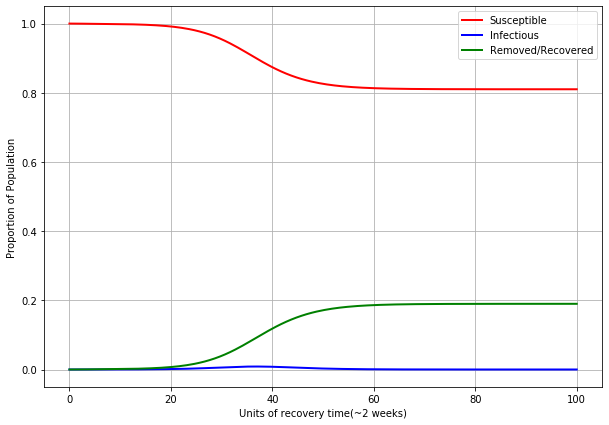

0.8101016336604312

In [86]:
### SKIP
### TEST YOUR CODE HERE ###
def SIRModelWithRecovered(t,R0,i0=1e-6):
    
    ### INPUT YOUR CODE BELOW THIS LIKE ###
    s0 = 1-i0
    
    def model(y,t):
        s,i,r = y
        return [-R0(s,i)*s*i,R0(s,i)*s*i-i,i]
    
    initial = [s0,i0,0]
    sol = odeint(model,initial,t)
    s,i,r = zip(*sol)
    return (s,i,r)

def SIRModelWithRecoveredForAus(t,R0,i0=1e-6):
    
    ### INPUT YOUR CODE BELOW THIS LIKE ###
    s0 = 1-i0
    
    def model(y,t):
        s,i,r = y
        return [-R0(s,t)*s*i,R0(s,t)*s*i-i,i]
    
    initial = [s0,i0,0]
    sol = odeint(model,initial,t)
    s,i,r = zip(*sol)
    return (s,i,r)
t = np.linspace(0,100,200)

def R0_do_nothing(s,i): 
    return 3.3*(s)

def R0_sweden(s, i): 
    if type(s) == np.ndarray:
        array = []
        for i in s:
            if i < 0.95:
                array.append(1.65*i)  
            else:
                array.append(3.3*i-(3.3*0.5)*((1-i)/0.07))
        return array
    else:
        return 1.65*s if s < 0.95 else 3.3*s-(3.3*0.5)*((1-s)/0.07)
    
    
def R0_aus(s,t): 
    if type(s) == np.ndarray:
        array = []
        for t_count,i in enumerate(s):
            t_val = t[t_count]
#             print('s=' + str(i), 't=' + str(t_val))
            if i < 0.99972:
                if t_val < 6:
                    array.append(.9*i)  
                elif t_val >= 6 and t_val <= 12:
                    additional_r = (t_val/12)*.3
                    array.append(.9*i + additional_r)
                elif t_val > 12:
                    additional_r = 3.3
                    array.append(.9*i + additional_r)
                
            else:
                array.append(3.3*i-(3.3*0.9)*((1-i)/0.07))
#             print('r0=' + str(array[-1]))
        print(array)
        return array
    else:
        if s < 0.99972:
                if t < 6:
                    return .9*s  
                elif t >= 6 and t <= 12:
                    additional_r = (t/12)*.3
                    return .9*s + additional_r
                elif t > 12:
                    additional_r = .3
                    return .9*s + additional_r
                
        else:
            return 3.3*s-(3.3*0.9)*((1-s)/0.07)

# infection_max(R0,0.2)

s,i,r = SIRModelWithRecoveredForAus(t,R0_aus)
# r = 1-s-i

# plot results
plt.clf()
plt.plot(t,s,'r',linewidth=2,label='Susceptible')
plt.plot(t,i,'b',linewidth=2,label='Infectious')
plt.plot(t,r,'g',linewidth=2,label='Removed/Recovered')

plt.xlabel('Units of recovery time(~2 weeks)')
plt.ylabel('Proportion of Population')
plt.legend()
plt.rcParams["figure.figsize"] = (10,7)
plt.grid()
plt.show()

s[-1]

In [74]:
def R0_sweden(s): 
    if type(s) == np.ndarray:
        array = []
        for i in s:
            if i < 0.95:
                array.append(1.65*i)  
            else:
                array.append(3.3*i-(3.3*0.5)*((1-i)/0.07))
        return array
    else:
        return 1.65*s if s < 0.95 else 3.3*s-(3.3*0.5)*((1-s)/0.07)
    
    
def R0_aus(s,t): 
    if type(s) == np.ndarray:
        array = []
        for t_count,i in enumerate(s):
            t_val = t[t_count]
#             print('s=' + str(i), 't=' + str(t_val))
            if i < 0.99972:
                if t_val < 6:
                    array.append(.9*i)  
                elif t_val >= 6 and t_val <= 12:
                    additional_r = (t_val/12)*.3
                    array.append(.9*i + additional_r)
                elif t_val > 12:
                    additional_r = .3
                    array.append(.9*i + additional_r)
                
            else:
                array.append(3.3*i-(3.3*0.9)*((1-i)/0.07))
#             print('r0=' + str(array[-1]))
        return array
    else:
        if s < 0.99972:
                if t < 6:
                    return .9*s  
                elif t >= 6 and t <= 12:
                    additional_r = (t/12)*.3
                    return .9*s + additional_r
                elif t > 12:
                    additional_r = .3
                    return .9*s + additional_r
                
        else:
            return 3.3*s-(3.3*0.9)*((1-s)/0.07)

infection_max(R0_aus,0.1)

TypeError: R0_aus() missing 1 required positional argument: 't'

### TASK 2: A multiple-peak epidemic

When we look at the news from around the world, we see a few general trends happening.

* If an epidemic is left to naturally "run its course", then infection fraction will comprise a single large bump (e.g. with the seasonal flu).
    
    
* In the case of a severe epidemic we now know that societies will respond and attempt to decrease $R_{0}$.


* The simplest response is "flattening the curve"; the peak is lower, the epidemic lasts longer, and perhaps fewer people overall get sick.
    

* Some societies, however, decide to reverse social-distancing policies during the epidemic.


* If "opening up" happens early enough, it means that epidemic behaves as it would with little or no intervention. You still get a single bump.
    
    
    
    
* If "opening up" happens late enough, then you get a smaller single bump. 



* If however, a country goes back to normal within a narrow window, then what looks like a single bump can turn into an epidemic with two peaks.


I want you to find an $R_{0}(s,i)$ that produces a double bump. Inside the function you can have it depend on $s$ and $i$ any way you want with the following conditions:

* **Zeroth**: the function must be positive for any well-defined input:

$$\large
0  \ <  \ R_{0}(s,i) , \qquad \text{for} \quad 0 \le s, i \le 1.
$$


* **First**, the value if no one is susceptible should be the same if everyone is and there is no infection.

$$\large
R_{0}(s=1,i=0) \ = \ R_{0}(s=0,i)
$$

* **Second**: the function should not become larger than its initial value at any point during the epidemic. 


$$\large
R_{0}(s,i) \ < \ R_{0}(s=1,i=0) \qquad \text{for} \quad 0 < s, i < 1.
$$


<br> 

As an aside, I've only been able to find a single or double peak solution. I have not been able to find any more than two peaks. Oscillating epidemics can occur if you include migration. But I doubt it's possible under our current assumptions. Extra points if you can prove me wrong. 

Also, I have only found solutions where the second peak is larger than the first. I don't have a strong opinion if it's possible to have the second peak be weaker than the first. But I'm also somewhat doubtful. Bonus points if you can find a solution satisfying our constraints where the latter peak is the smaller of the two.


### `multi_bump_R0`

Make a function called `multi_bump_R0` that will give a more than one peak if used in the `SIRModel`. 

* It must satisfy all the same requirement needed to use it in the ODE solver. 

* In addition, make sure your function is *vectorised*. This will make it easy to test if it satisfies the above inequality conditions. 


In [13]:
### TEST FUNCTION: test_multi_bump_R0
## DO NOT ERASE ANYTHING INITIALLY IN THIS CELL ##

def multi_bump_R0(s,i):
    
    ### INPUT YOUR CODE BELOW THIS LIKE ###
    return 6*(1.3+np.cos(2*np.pi*s))**1.9


In [14]:
### SKIP
### TEST YOUR CODE HERE ###
from mpl_toolkits import mplot3d

# def f(x, y):
#     return 6*(1.3+np.cos(2*np.pi*s))**1.9

x = np.linspace(0, 1, 30)
y = np.linspace(0, 1, 30)

# X, Y = np.meshgrid(x, y)
# Z = f(X, Y)
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, Z, 50, cmap='binary')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z');

#what do we want. 
# from s = 1 to s = 0.8
# from 
multi_bump_R0(x[1],y[1])

28.64200991191203

<br>

# MATH 3976/4076 PROJECT


For advanced-stream students earning an "HD" mark in the course will require completing a short written report. What am I looking for? 

First, you must complete all of the above TASKS on Assignment 2 and submit them before the normal deadline. This will give you a good introduction to the tools you'll need to investigate deeper. 



What else? I'm leaving things open-ended intentionally. But I can give you a few guidelines to help out. 


#### When:
    
    
* **2 JUNE** a short (1-3 paragraph) description of your project along with the normal assignment 
    
    
    
* **23 JUNE** Final written report + code. 



#### What


* A PDF $\approx$ 7-14 pages; text, figures, references. 


* LaTeX-typed document. I want *nice* figures justifying any conclusions you make; proper labels, etc. 


* A Python script (`.py` file) with your code. 


* A well-organised Jupyter notebook detailing how your code works. 




I'm looking for you to be creative in exploring some of the causes and consequences of the epidemic. Here are is an incomplete list with some possible ideas that I'm looking for. 

* More weight will be given to things specifically addressing COVID-19. 


* You should generalise our above model somehow. 


* You could consider the effect of migration.


* You could try to explore more of the consequences of social-distancing. 


* You could try to incorporate real-world data. 


* For example, you could try to determine the actual $R_{0}(s,i)$ for different countries. 


* You could consider multiple interacting populations. 


I highly recommend reading and thinking about things like this:


https://quomodocumque.wordpress.com/2020/05/12/pandemic-blog-20-r_0-random-graphs-and-the-l_2-norm/


I like the idea of a dynamical a model that looks at several interacting countries. 

* What can you say qualitatively?


* Are the conclusions of this blog post actually relevant for the equilibrium of SIR models? 


* Can you find any general conditions of the parameters that might be distilled into the simple advice for policymakers?


These are just a few thoughts to get you thinking. I'm looking for professional and creative results. I have a few years experience seeing what kind of high-quality work advanced students can produce. I expect no less this year. 


Lastly, while I can't make any guarantees, a lot of work relating to COVID-19 is research worthy of publication. I'm considering publishing something on these topics myself. I'm happy to include any (or all) student work in a research paper if you come up with something interesting. I see no problem putting everyone on a paper if everyone discovers something new. And with a topic like this, it's not as hard as you might think.

For one example: 

https://royalsocietypublishing.org/doi/pdf/10.1098/rsos.191187


This is a recent paper (not anticipating COVID-19). It should also give you some ideas to consider. One of my close friends knows the authors; 3 of them are undergrads like yourselves. 


That's about it for now. 

* If you are a **MATH 3076** student who wants to try the project, please contact me directly. 


* I'm happy to set up a Zoom meeting for any students who want to discuss their project. 



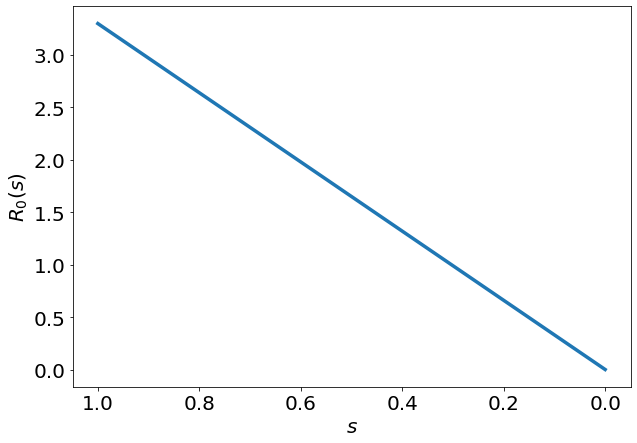

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

def err(A,B=1,report=False):
    """Fractional error of A with respect to B.
       Optionally print errors.
    """
    e = abs(A-B)/abs(B)

    if report : print("T, S, |T-S|/|S| : {:>8.2e}, {:>8.2e}, {:>8.2e}".format(A,B,e))

    return e

class show_plots:
    
    def __init__(self,linewidth=2.5,fontsize=20,titlesize=15,legendsize=12,
                 xy=['$x$','$f(x)$'],title='',style='plot',figsize=None):
        
        
        self.linewidth  = linewidth
        self.fontsize   = fontsize
        self.titlesize  = titlesize
        self.legendsize = legendsize
        self.xlabel     = xy[0]
        self.ylabel     = xy[1]
        self.title      = title
                
        self.fig, self.ax = plt.subplots(figsize=figsize)
        
        self.ax.set_xlabel(self.xlabel,fontsize=fontsize)
        self.ax.set_ylabel(self.ylabel,fontsize=fontsize)
        self.ax.set_title(self.title,fontsize=titlesize)
        self.ax.tick_params(axis='both',labelsize=fontsize)
        self.ax.invert_xaxis()

        self.style = style
        
    def __call__(self,x,y,color=None):
        
        if self.style == 'plot':
            self.ax.plot(x,y,linewidth=self.linewidth,color=color)
            
        if self.style == 'log':
            self.ax.semilogy(x,y,linewidth=self.linewidth,color=color)
            
        if self.style == 'log-log':
            self.ax.loglog(x,y,linewidth=self.linewidth,color=color)
        
        
    def __getitem__(self,*args):
        
        self.ax.legend(list(args[0]),prop={'size': self.legendsize})
        
def R0_do_nothing(s): return 3.3*s
n = 10
show = show_plots(linewidth=3.5,xy=['$s$','$R_0(s)$'], figsize=[10,7])
s = np.linspace(1,0,101)
show(s,R0_do_nothing(s))

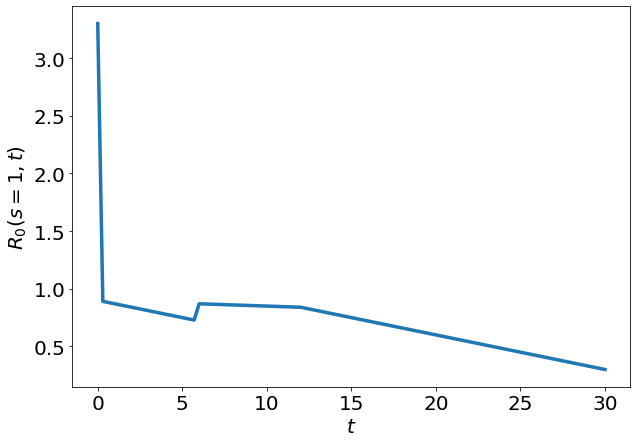

In [39]:
def R0_aus(s,t): 
    if type(s) == np.ndarray:
        array = []
        for t_count,i in enumerate(s):
            t_val = t[t_count]
#             print('s=' + str(i), 't=' + str(t_val))
            if i < 0.99972:
                if t_val < 6:
                    array.append(.9*i)  
                elif t_val >= 6 and t_val <= 12:
                    additional_r = (t_val/12)*.3
                    array.append(.9*i + additional_r)
                elif t_val > 12:
                    additional_r = .3
                    array.append(.9*i + additional_r)
                
            else:
                array.append(3.3*i-(3.3*0.9)*((1-i)/0.07))
#             print('r0=' + str(array[-1]))
        return array
    else:
        if s < 0.99972:
                if t < 6:
                    return .9*s  
                elif t >= 6 and t <= 12:
                    additional_r = (t/12)*.3
                    return .9*s + additional_r
                elif t > 12:
                    additional_r = .3
                    return .9*s + additional_r
                
        else:
            return 3.3*s-(3.3*0.9)*((1-s)/0.07)
n = 10
t = np.linspace(0,30,101)
show = show_plots(linewidth=3.5,xy=['$t$','$R_0(s=1,t)$'])
s = np.linspace(1,0,101)
show(t,R0_sweden(s,t)) 

In [46]:
3.3 - 3.3*0.5

1.65

[[ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.3  0.3  0.3 ...  0.3  0.3  0.3]
 [ 0.6  0.6  0.6 ...  0.6  0.6  0.6]
 ...
 [29.4 29.4 29.4 ... 29.4 29.4 29.4]
 [29.7 29.7 29.7 ... 29.7 29.7 29.7]
 [30.  30.  30.  ... 30.  30.  30. ]]


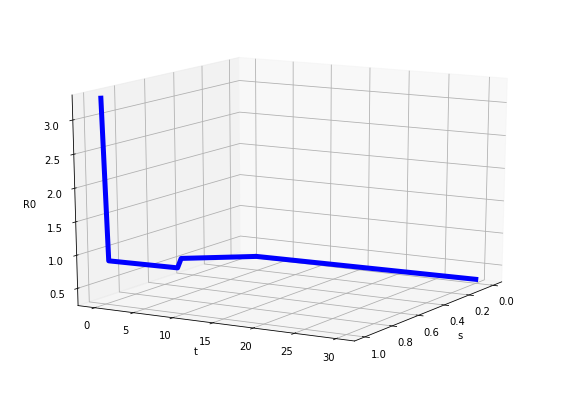

In [72]:
from matplotlib.animation import FuncAnimation
import sys
from matplotlib import animation


def R0_aus_vectorised(s,t): 
    if type(s) == np.ndarray:
        array = []
        
        for t_count,i in enumerate(s):
            t_val = t[t_count]
#             print('s=' + str(i), 't=' + str(t_val))
            if i < 0.99972:
                if t_val < 6:
                    array.append(.9*i)  
                elif t_val >= 6 and t_val <= 12:
                    additional_r = (t_val/12)*.3
                    array.append(.9*i + additional_r)
                elif t_val > 12:
                    additional_r = .3
                    array.append(.9*i + additional_r)
                
            else:
                array.append(3.3*i-(3.3*0.9)*((1-i)/0.07))
#             print('r0=' + str(array[-1]))
        return array
    else:
        if s < 0.99972:
                if t < 6:
                    return .9*s  
                elif t >= 6 and t <= 12:
                    additional_r = (t/12)*.3
                    return .9*s + additional_r
                elif t > 12:
                    additional_r = .3
                    return .9*s + additional_r
                
        else:
            return 3.3*s-(3.3*0.9)*((1-s)/0.07)
    
func3d_vectorized = np.vectorize(R0_sweden_mesh)

X, Y = np.meshgrid(s, t)
print(Y)
Z = func3d_vectorized(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
t = np.linspace(0,30,101)
s = np.linspace(1,0,101)
r0 = func3d_vectorized(s,t)
ax.plot3D(s, t, r0, 'b',linewidth=5)

ax.set_xlabel('s')
ax.set_ylabel('t')
ax.set_zlabel('R0')
ax.view_init(15,30)
plt.draw()
plt.pause(.001)

# def init():
#     return fig,

# def animate(i):
#     ax.view_init(elev=10., azim=i)
#     return fig,

# # Animate
# anim = animation.FuncAnimation(fig, animate, init_func=init,
#                                frames=360, interval=20, blit=True)
# # Save
# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])